# Overview

Active Learning - way to train mode faster with fewer models. we do this by allowing th model to choose which unlabled examples to ask about next
    - Instead of just labeling everything,. we priporitise the most useful item first - typically the ones that a model is most unsure about, or potentially items that represent some new pattern (distrinbution)
    - 20 questions analogy - narrow downas efficiently as smart question

Labelling data = expensive
If we can label fewer items, save moeny and time - focuing on the most informative exmaples
Sustainable - less compute bc learning more efficiently


Initial training set size: 60 samples


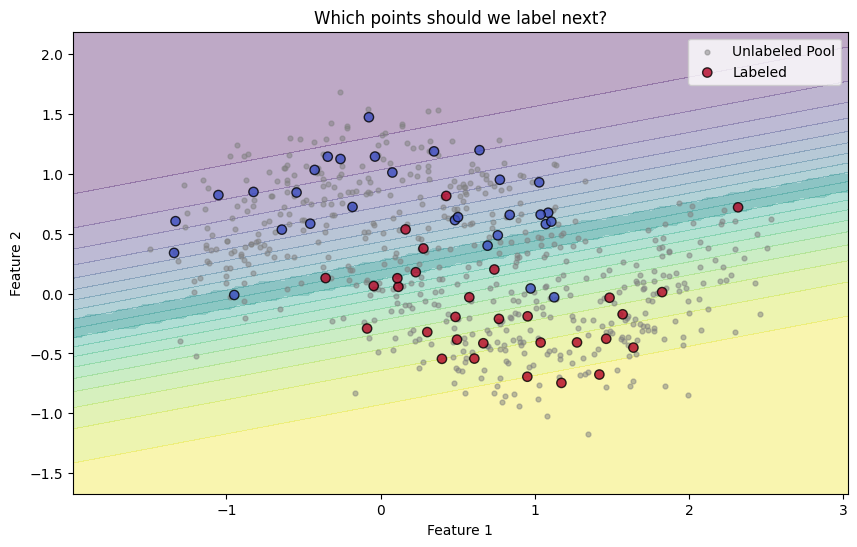

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. generate a moon dataset
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

# 2. start with just a small labeled set (simulate "what we already know")
X_train, X_pool, y_train, y_pool = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

print(f"Initial training set size: {X_train.shape[0]} samples")

# 3. fit a really simple logistic regression model 
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# 4. build a grid (visualise our predictions)
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100),
    np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

# 5. define an "uncertain" band - where the model is unsure (i.e. near 50/50)
uncertain = (probs > 0.45) & (probs < 0.55)

# 6. plot

# set-up and shading! 
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, levels=20, alpha=0.35)
plt.contourf(xx, yy, uncertain, levels=[0.5, 1], alpha=0.25)

# plot our points
plt.scatter(X_pool[:, 0], X_pool[:, 1], c='gray', s=12, label='Unlabeled Pool', alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", s=45, label='Labeled', alpha=0.8, edgecolor='k')

plt.legend(loc='upper right')
plt.title("Which points should we label next?")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Section 2: first look at random vs active learning

We'll work with random forest (logistic regression ios linear)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as clear_output, display

from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

try:
    import ipywidgets as widgets
    from ipywidgets import interact, interactive, fixed, interact_manual

ModuleNotFoundError: No module named 'display'